# Clustering

In [10]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [11]:
data = pd.read_csv(r"C:\Users\Ruslan\Desktop\DataCity - Python\Final Project\clustering.csv")
data

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


## Preprocessing

In [12]:
raw_data = data.copy()

In [13]:
raw_data.describe(include='all')

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,980,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
unique,980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,User 664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,NaN,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,NaN,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,NaN,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,NaN,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,NaN,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000


In [14]:
# Determining the variables of interest
raw_data = raw_data.drop('User ID', axis=1)
raw_data.head(5)

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [15]:
# Dealing with missing values
raw_data.isnull().sum()

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
dtype: int64

In [16]:
raw_data.dtypes

Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
dtype: object

In [17]:
# Dealing with outliers
raw_data.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


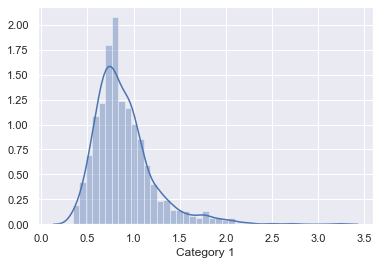

In [19]:
sns.distplot(raw_data['Category 1'])

In [20]:
q = raw_data["Category 1"].quantile(0.99)
data1 = raw_data[raw_data['Category 1']<q]

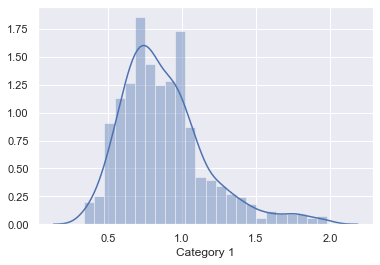

In [21]:
sns.distplot(data1['Category 1'])

In [22]:
data1.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000
mean,0.878361,1.354103,1.014567,0.533670,0.941876,1.843814,3.180959,2.834732,1.569619,2.796928
std,0.291617,0.475864,0.789375,0.280654,0.437099,0.534829,0.007817,0.137629,0.365548,0.319472
min,0.340000,0.000000,0.130000,0.170000,0.060000,0.380000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.825000,0.500000,0.900000,1.800000,3.180000,2.820000,1.500000,2.780000
75%,1.020000,1.560000,1.577500,0.580000,1.200000,2.195000,3.180000,2.910000,1.760000,3.020000
max,1.980000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


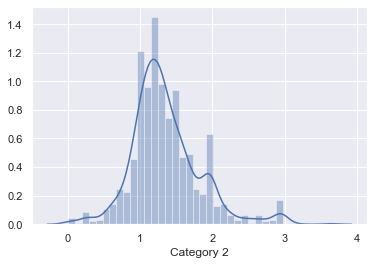

In [23]:
sns.distplot(raw_data['Category 2'])

In [25]:
q = data1["Category 2"].quantile(0.99)
data2 = data1[data1['Category 2']<q]
data2.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,0.878932,1.328000,1.018073,0.532796,0.941194,1.840105,3.180974,2.833843,1.567602,2.795560
std,0.292633,0.430624,0.791003,0.278590,0.438471,0.535316,0.007837,0.136945,0.364868,0.318858
min,0.340000,0.000000,0.130000,0.170000,0.060000,0.380000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.830000,0.500000,0.900000,1.800000,3.180000,2.820000,1.500000,2.780000
75%,1.020000,1.560000,1.575000,0.580000,1.200000,2.190000,3.180000,2.910000,1.760000,3.020000
max,1.980000,2.920000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


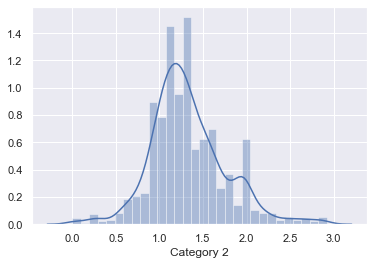

In [27]:
sns.distplot(data2['Category 2'])

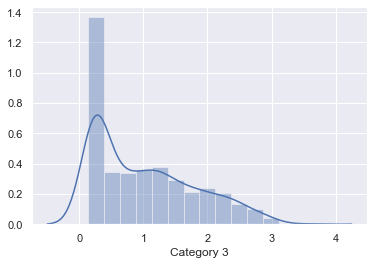

In [28]:
sns.distplot(raw_data['Category 3'])

In [29]:
q = data2["Category 3"].quantile(0.99)
data3 = data2[data2['Category 3']<q]
data3.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,0.879810,1.327534,0.996487,0.531270,0.938519,1.836466,3.180783,2.834381,1.569862,2.798857
std,0.293771,0.431636,0.766365,0.277991,0.438839,0.534150,0.007648,0.136954,0.365784,0.317245
min,0.340000,0.000000,0.130000,0.170000,0.060000,0.380000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.550000,0.580000,1.200000,2.180000,3.180000,2.910000,1.760000,3.020000
max,1.980000,2.920000,2.890000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


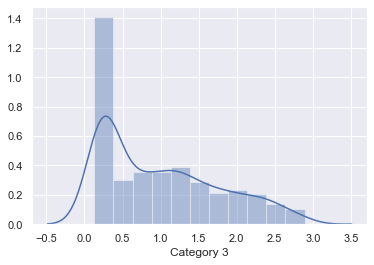

In [30]:
sns.distplot(data3['Category 3'])

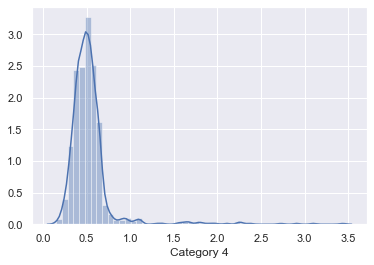

In [31]:
sns.distplot(raw_data['Category 4'])

In [35]:
q = data3["Category 4"].quantile(0.97)
data4 = data3[data3['Category 4']<q]
data4.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,0.876692,1.318908,1.007063,0.491747,0.937314,1.833406,3.180742,2.836583,1.570513,2.807860
std,0.291664,0.419211,0.770038,0.122529,0.436355,0.534208,0.007689,0.136736,0.366970,0.317169
min,0.340000,0.000000,0.130000,0.170000,0.060000,0.380000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.840000,0.490000,0.890000,1.780000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.520000,1.570000,0.570000,1.200000,2.180000,3.180000,2.930000,1.760000,3.040000
max,1.980000,2.880000,2.890000,0.980000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


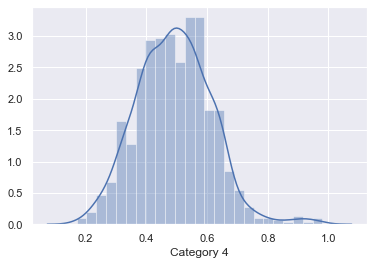

In [36]:
sns.distplot(data4['Category 4'])

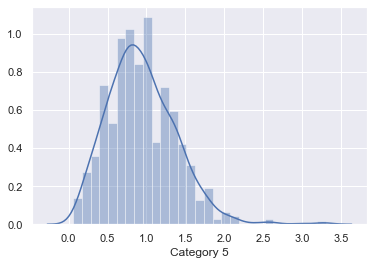

In [37]:
sns.distplot(raw_data['Category 5'])

In [39]:
q = data4["Category 5"].quantile(0.99)
data5 = data4[data4['Category 5']<q]
data5.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000
mean,0.878179,1.319868,1.008587,0.491711,0.918786,1.826766,3.180762,2.836887,1.568709,2.808499
std,0.292741,0.418923,0.770138,0.122930,0.398958,0.532273,0.007708,0.136656,0.363635,0.317406
min,0.340000,0.000000,0.130000,0.170000,0.060000,0.380000,3.160000,2.420000,0.740000,2.260000
25%,0.670000,1.080000,0.270000,0.410000,0.625000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.855000,0.490000,0.880000,1.780000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.520000,1.570000,0.570000,1.200000,2.180000,3.180000,2.930000,1.760000,3.040000
max,1.980000,2.880000,2.890000,0.980000,2.080000,3.760000,3.210000,3.390000,3.170000,3.660000


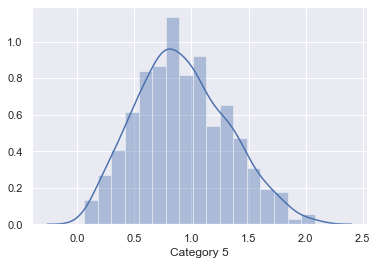

In [40]:
sns.distplot(data5['Category 5'])

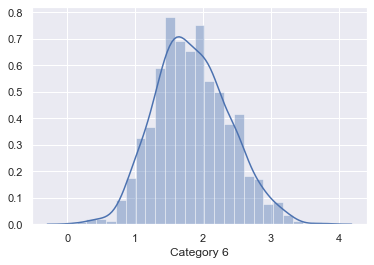

In [41]:
sns.distplot(raw_data['Category 6'])

C:\Users\Ruslan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


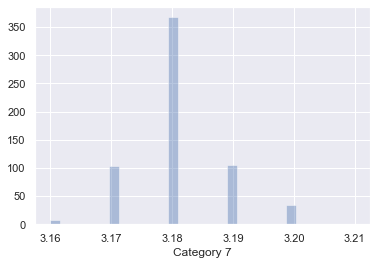

In [42]:
sns.distplot(raw_data['Category 7'])

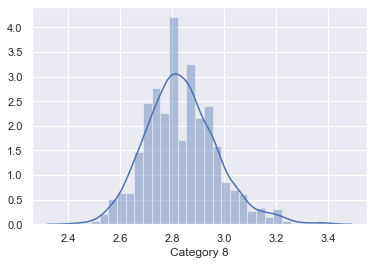

In [44]:
sns.distplot(raw_data['Category 8'])

In [45]:
q = data5["Category 8"].quantile(0.99)
data6 = data5[data5['Category 8']<q]
data6.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.00000
mean,0.879185,1.323304,1.012310,0.491172,0.918750,1.826105,3.180770,2.831953,1.566730,2.80875
std,0.292610,0.417965,0.772163,0.123135,0.398334,0.531818,0.007751,0.128963,0.363811,0.31872
min,0.340000,0.000000,0.130000,0.170000,0.060000,0.380000,3.160000,2.420000,0.740000,2.26000
25%,0.670000,1.080000,0.270000,0.410000,0.635000,1.460000,3.180000,2.740000,1.310000,2.54000
50%,0.830000,1.280000,0.860000,0.490000,0.880000,1.780000,3.180000,2.820000,1.520000,2.78000
75%,1.020000,1.520000,1.570000,0.570000,1.200000,2.180000,3.180000,2.910000,1.760000,3.04000
max,1.980000,2.880000,2.890000,0.980000,2.080000,3.760000,3.210000,3.200000,3.170000,3.66000


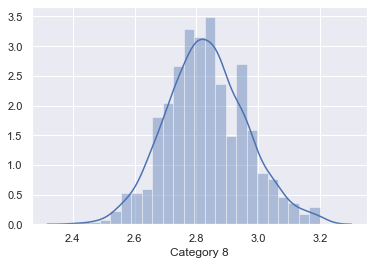

In [46]:
sns.distplot(data6['Category 8'])

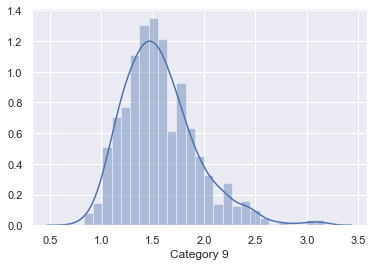

In [47]:
sns.distplot(raw_data['Category 9'])

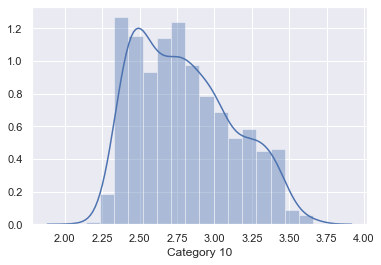

In [48]:
sns.distplot(raw_data['Category 10'])

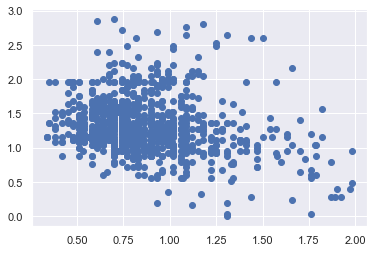

In [49]:
plt.scatter(data6['Category 1'], data6['Category 2'])

### Multicollinearity

In [51]:
data6.columns

Index(['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10'],
      dtype='object')

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = data6[['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variable.values, i) for i in range(variable.shape[1])]
vif['Features'] = variable.columns
vif.sort_values(by = ['VIF'], ascending=False)

,VIF,Features
6,762.571482,Category 7
7,534.368924,Category 8
9,141.365582,Category 10
3,26.143109,Category 4
5,25.902996,Category 6
8,20.880781,Category 9
1,12.467591,Category 2
0,11.259718,Category 1
4,10.294397,Category 5
2,3.941251,Category 3


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = data6[['Category 1', 'Category 2', 'Category 3', 'Category 5']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variable.values, i) for i in range(variable.shape[1])]
vif['Features'] = variable.columns
vif.sort_values(by = ['VIF'], ascending=False)

,VIF,Features
1,6.492559,Category 2
3,6.271337,Category 5
0,5.260577,Category 1
2,3.049458,Category 3


In [63]:
data_preprocessed = data6[['Category 1', 'Category 2', "Category 3", "Category 5"]]
data_preprocessed

,Category 1,Category 2,Category 3,Category 5
0,0.93,1.80,2.29,0.80
1,1.02,2.20,2.66,1.42
2,1.22,0.80,0.54,0.24
3,0.45,1.80,0.29,0.46
4,0.51,1.20,1.18,1.54
...,...,...,...,...
975,0.74,1.12,0.30,0.88
976,1.25,0.92,1.12,0.78
977,0.61,1.32,0.67,1.30
978,0.93,0.20,0.13,0.30


In [67]:
x = data_preprocessed[['Category 1', 'Category 2', 'Category 3', "Category 5"]]
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(x, test_size = 0.3, random_state=0)

### Clustering

In [82]:
from sklearn.cluster import KMeans

# Elbow method
wcss_val = []
for i in range(1, 8):
    kmeans = KMeans(i)
    kmeans.fit(x_train)
    wcss_iter = kmeans.inertia_
    wcss_val.append(wcss_iter)

Text(0, 0.5, 'Within-cluster Sum of Squares')

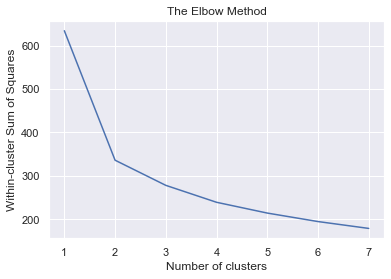

In [85]:
# Create values for x axis
number_clusters = range(1,8)
# Plot the number of clusters vs WCSS
plt.plot(number_clusters,wcss_val)
# Name your graph
plt.title('The Elbow Method')
# Name the x-axis
plt.xlabel('Number of clusters')
# Name the y-axis
plt.ylabel('Within-cluster Sum of Squares')

In [93]:
kmeans = KMeans(2)
kmeans.fit(x_train)

KMeans(n_clusters=2)

In [94]:
identified_clusters = kmeans.fit_predict(x_test)
identified_clusters

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1])

In [95]:
data_with_cluster = x_test.copy()
data_with_cluster['Clusters'] = identified_clusters
data_with_cluster

,Category 1,Category 2,Category 3,Category 5,Clusters
160,0.58,1.12,1.57,0.78,1
65,1.47,0.72,0.53,0.48,0
803,1.31,0.04,0.98,0.54,0
33,1.06,1.12,0.21,0.98,0
557,0.96,0.88,0.22,0.42,0
...,...,...,...,...,...
965,0.64,0.96,0.22,1.74,0
971,1.28,1.24,0.14,0.62,0
129,0.54,1.20,0.45,0.88,0
85,0.74,1.84,0.24,0.80,0


(-0.006000000000000005, 2.986)

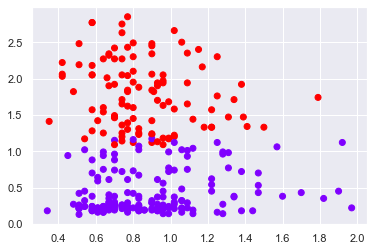

In [100]:
plt.scatter(data_with_cluster['Category 1'], data_with_cluster['Category 3'], c=data_with_cluster['Clusters'], cmap='rainbow')
plt.xlim()
plt.ylim()